# TP 8 - Arbres binaires

In [13]:
%load_ext autoreload
%autoreload 2

## Afficher un arbre

Créons un arbre avec l'implémentation étudiée en cours (utilisant la POO):

In [14]:
from arbres import Noeud, graphe_arbre, structure

In [3]:
a = Noeud("Racine", 
          Noeud("Noeud 1", 
                Noeud("F1"), 
                Noeud("F2")), 
         Noeud("F3"))

In [4]:
graphe_arbre(a)

In [5]:
structure(a)

---
## Exercice 1

Représenter tous les arbres binaires ayant respetivement 3 ou 4 noeuds.

**Méthode pour énumérer tous les arbres manuellement** Comme tous les exercices consistant à énumérer des formes, toute la difficulté consiste à:
* s'assurer que l'on n'a pas déjà trouvé un arbre auparavant (cela oblige à tester scrupuleusement la présence de doublons);
* trouver un moyen systématique de trouver les arbres manquants;
* être certain du moment où on a trouvé tous les arbres.

On peut s'inspirer de l'exercice suivant pour trouver un algorithme permettant de déterminer tous les arbres de taille donnée:

1. Un arbre à $n$ noeuds comporte toujours exactement un noeud racine. Il reste donc $n-1$ noeuds à répartir entre les deux sous-arbres.
1. On cherche toutes les combinaisons de $n-1$ comme somme de deux entiers:
$$
\begin{aligned}
n-1 & = (n-1) + 0 \\
& = (n-2) + 1 \\
& = (n-3) + 2 \\
& \,\,\vdots \\
& = 2 + (n-3) \\
& = 1 + (n-2) \\
& = 0 + (n-1)
\end{aligned}
$$
Il y a exactement $n$ combinaisons du type $n-1 = i + j$, avec $j = (n-1) - i$.

Pour chacune d'entre elle, on prend toutes les combinaisons d'arbres à $i$ noeuds et à $j$ noeuds, et on crée un nouvel arbre ayant un noeud racine pointant sur l'arbre à $i$ noeuds à gauche et l'arbre à $j$ noeuds à droite.

![](arbres01.png)

Cette façon de procéder nous assure que nous aurons énuméré exactement tous les abres à $n$ noeuds.

> **Complément (très difficile):** Écrire une fonction `énumère_arbres_binaires(n)` renvoyant une liste de tous les arbres binaires à $n$ noeuds.

Une idée exploitable consiste à écrire une fonction `énumère_arbres(n)` qui renvoie une liste des arbres à $n$ noeuds.

In [6]:
def énumère_arbres(n):
    """
    Renvoie une liste de tous les arbres à n noeuds.
    """
    
    if n == 0:
        return [None] # Une liste contenant juste l'arbre vide
    else:
        # On utilise exactement l'algorithme décrit un peu plus haut.


        liste = []
        for i in range(n): # i va de 0 à n-1
            j = (n-1) - i # On a bien i + j = n-1

            for g in énumère_arbres(i):
                for d in énumère_arbres(j):
                    liste.append(Noeud(gauche=g, droite=d))

        return liste

Arbres à 3 noeuds (il y en a 5):


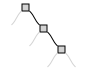

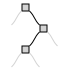

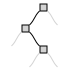

Arbres à 4 noeuds (il y en a 14):


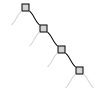

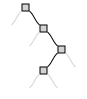

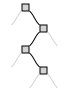

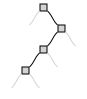

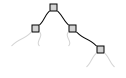

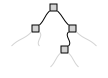

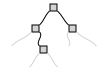

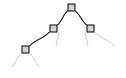

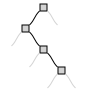

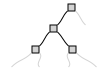

In [7]:
l3 = énumère_arbres(3)
print("Arbres à 3 noeuds (il y en a {}):".format(len(l3)))
for a in l3:
    display(structure(a))
    
l4 = énumère_arbres(4)
print("Arbres à 4 noeuds (il y en a {}):".format(len(l4)))
for a in l4:
    display(structure(a))

---
## Exercice 2

On admet les données suivantes:
* il y a 1 arbre binaire vide;
* il y a 1 arbre binaire contenant 1 noeud;
* il y a 2 arbres binaires contenant 2 noeuds;
* il y a 5 arbres binaires contenant 3 noeuds;
* il y a 14 arbres binaires contenant 4 noeuds;


Notons $A_n$ le nombre d'arbres à $n$ noeuds. Il est évident que $A_0 = 1$ et que $A_1 = 1$.

D'après l'algorithme décrit à l'exercice précédent, le nombre d'arbres à $n$ noeuds est donné par la formule:
$$
A_n = \sum_{i = 0}^{n-1}A_i\times A_{n-1-i}
$$

En effet, lorsque l'on a décomposé $n-1$ en une somme $i + j$ avec $j = n-1 - i$, il y a $A_i$ sous-arbres à gauche possibles et $A_j$ sous-arbres à droite possibles, ce qui fait $A_i\times A_j = A_i\times A_{n-1-i}$ combinaisons possibles.

Il reste ensuite à sommer tous ces produits lorsque $i$ varie de $0$ à $n-1$.

On trouve alors successivement:
$$
\begin{aligned}
A_0 & = 1 \\
A_1 & = 1 \\
A_2 & = A_0\times A_1 + A_1\times A_0 = 2 \\
A_3 & = A_0\times A_2 + A_1\times A_1 + A_2\times A_1 = 2 + 1 + 2 = 5 \\
A_4 & = A_0\times A_3 + \cdots + A_3\times A_0 = 5 + 2 + 2 + 5 = 14 \\
A_5 & = A_0\times A_4 + \cdots + A_4\times A_0 = 14 + 5 + 4 + 5 + 14 = 42
\end{aligned}
$$

> **Complément (modérément difficile):** En vous inspirant de cet exercice, écrire une fonction `nombre_arbres_binaires(n)` renvoyant le nombre d'arbres binaires à $n$ noeuds.

Implémentons cet algorithme:

In [8]:
def nombre_arbres(n):
    """
    Renvoie le nombre d'abres à n noeuds.
    """
    
    if n == 0:
        return 1
    else:
        somme = 0
        for i in range(n):
            somme += nombre_arbres(i)*nombre_arbres(n-1-i)
        return somme

In [10]:
print("On cherche le plus petit n pour lequel le nombre d'arbres")
print("est strictement supérieur à 1 million:")
i = 0
N = 0
while N <= 1e6:
    N = nombre_arbres(i)
    print("Il y a {} arbres à {} noeuds".format(N, i))
    i += 1

On cherche le plus petit n pour lequel le nombre d'arbres
est strictement supérieur à 1 million:
Il y a 1 arbres à 0 noeuds
Il y a 1 arbres à 1 noeuds
Il y a 2 arbres à 2 noeuds
Il y a 5 arbres à 3 noeuds
Il y a 14 arbres à 4 noeuds
Il y a 42 arbres à 5 noeuds
Il y a 132 arbres à 6 noeuds
Il y a 429 arbres à 7 noeuds
Il y a 1430 arbres à 8 noeuds
Il y a 4862 arbres à 9 noeuds
Il y a 16796 arbres à 10 noeuds
Il y a 58786 arbres à 11 noeuds
Il y a 208012 arbres à 12 noeuds
Il y a 742900 arbres à 13 noeuds
Il y a 2674440 arbres à 14 noeuds


---
## Exercice 3

Plutôt que de représenter un arbre à l'aide de la classe `Noeud` étudiée en cours, on souhaite utiliser des **chaînes de caractères** `str`: 
* pour un arbre vide, on utilise une chaîne vide;
* pour un noeud on utilise une parenthèse ouvrante, le sous-arbre gauche (éventuellement vide), la valeur, le sous-arbre droit (éventuellement vide), et enfin une parenthèse fermante. On a donc:

  ```python
  "(<sous-arbre gauche><valeur><sous-arbre droit>)"
  ```

1. Dessiner l'arbre dont la représentation est `"((B(C))A(D))"`

Pour dessiner l'arbre correspondant à une chaîne, on peut utiliser l'algorithme suivant:
1. On parcourt tous les caractères de la chaîne de gauche à droite.
1. Dès que l'on croise une parenthèse ouvrante, on doit créer un nouveau noeud. Le premier sera le noeud racine, les noeuds suivants seront ajoutés au noeud courant d'abord à gauche, puis à droite (et on a une erreur due à une chaîne mal structurée si on tente d'ajouter un troisième sous-arbre, puisque nos arbres sont binaires).
1. Une parenthèse fermante nous fait remonter au noeud précédent. Si on rencontre une parenthèse fermante alors que l'on vient de quitter le noeud racine, on a une chaîne mal parenthésée.
1. Une valeur autre qu'une parenthèse donne la valeur du noeud courant. On ne peut rajouter de valeur qu'entre le sous-arbre gauche et le sous-arbre droit, bien que l'un ou l'autre de ces sous-arbres pourrait ne pas exister.

Appliqué à la chaîne `"((B(C))A(D)))"`, on obtient l'arbre suivant:

In [35]:
a = Noeud("A", Noeud("B", droite=Noeud("C")), Noeud("D"))
display(graphe_arbre(a))

Remarquons que l'algorithme précédent construit l'arbre tout en le parcourant en profondeur d'abord:

![](arbres02.png)

2. Écrire une fonction `arbre_vers_chaîne(noeud)` qui prend pour paramètre la racine d'un arbre binaire, et renvoie la chaîne de caractère le décrivant, selon le schéma précédent.

On peut s'inspirer de l'algorithme précédent (qui sera implémenté à la question suivante) pour réaliser l'opération inverse, à savoir créer une chaîne à partir d'un arbre:

On effectue un parcours en profondeur d'abord, et on rajoute les caractères à la chaîne au fur et à mesure, en suivant les contraintes suivantes:

1. À chaque nouveau noeud, on rajoute une parenthèse ouvrante;
1. Dès que l'on quitte un noeud (après avoir exploré ses éventuels sous-arbres), on rajoute une parenthèse fermante;
1. Lorsque l'on a terminé le parcours du sous-arbre gauche d'un noeud, on rajoute la valeur de celui-ci (si elle existe);

In [36]:
def arbre_vers_chaîne(noeud):
    """
    Renvoie une chaîne de caractères décrivant un arbre.
    """
    
    if noeud is None:
        return ""
    else:
        chaîne = "("
        chaîne += arbre_vers_chaîne(noeud.gauche)
        chaîne += str(noeud.valeur)
        chaîne += arbre_vers_chaîne(noeud.droite)
        chaîne += ")"
        return chaîne

In [38]:
# On reprend l'arbre précédent:
a = Noeud("A", Noeud("B", droite=Noeud("C")), Noeud("D"))
arbre_vers_chaîne(a)

'((B(C))A(D))'

3. **(plus difficile)** Écrire une fonction `crée_arbre(chaîne)` prenant pour paramètre la description d'un arbre binaire donnée sous la forme précédente, et renvoyant le noeud racine de cet arbre à l'aide de la classe `Noeud`.

**Indication:** Vous pouvez vous inspirer de l'exercice vu dans le TP sur les piles, demandant de tester si une expression est bien parenthésée et donnant pour chaque parenthèse fermante la position de la parenthèse ouvrante correspondante.

Plutôt que d'utiliser une pile comme indiqué un peu plus haut, on va procéder récursivement.

In [27]:
def lit_noeud(chaîne, position):
    """
    Lit un noeud contenu dans 'chaîne', à partir de l'indice 
    'position'.
    
    Le caractère chaîne[position] doit être '(' sous peine de
    déclencher une erreur.
    
    N'accepte aucun espace. La valeur d'un noeud doit être un
    unique caractère (hors parenthèses).
    
    Renvoie le noeud, ainsi que la position du prochain caractère
    à lire après la parenthèse fermante ')' clôturant le noeud.
    """
    
    assert chaîne[position] == "("
    
    position += 1
    
    # On lit un éventuel sous-arbre à gauche
    if chaîne[position] == "(":
        gauche, position = lit_noeud(chaîne, position)
    else:
        gauche = None
    
    # On lit la valeur du noeud
    assert chaîne[position] not in "()"
    valeur = chaîne[position]
    position += 1
    
    # on lit un éventuel sous-arbre à droite
    if chaîne[position] == "(":
        droite, position = lit_noeud(chaîne, position)
    else:
        droite = None
        
    # Le noeud se termine
    assert chaîne[position] == ")"
    position += 1
    
    return Noeud(valeur, gauche, droite), position

def crée_arbre(chaîne):
    racine, position = lit_noeud(chaîne, 0)
    assert position == len(chaîne)
    
    return racine

In [28]:
graphe_arbre(crée_arbre('((B(C))A(D))'))

---
## Exercice 4

1. Ajouter à la classe `Noeud` une méthode `__str__` en vous inspirant de la fonction `affiche` de l'exercice précédent.

**→ Voir `arbres.py`**

1. Implémenter de même la fonction `__repr__`, dont le résultat doit être l'expression python à saisir pour recréer l'objet (par exemple `Noeud(1, Noeud(2), Noeud(3))` ).

**→ Voir `arbres.py`**

1. Ajouter à la classe `Noeud` un paramètre _optionnel_ au constructeur, décrivant l'arbre à construire comme pour la fonction `crée_arbre` de l'exercice précédent. Dans ce cas, il faut rendre le paramètre `valeur` lui aussi optionnel, car une valeur (ou bien des sous-arbres gauche et droite) n'aurait aucun sens si la structure de l'arbre complet est donnée. On peut déclencher une erreur en cas d'arguments contradictoires.

**→ Voir `arbres.py`, sera fait en fin de TP**

---
## Exercice 5

Implémenter dans la classe `Noeud` la méthode `__eq__` testant **recursivement** l'égalité de 2 noeuds. 

**→ Voir `arbres.py`**

---
## Exercice 6

1. Écrire une fonction `parfait(h)` renvoyant un arbre parfait (dont les valeurs sont toutes vides) de hauteur h. L'exemple précédent est un arbre parfait de hauteur 3.

In [42]:
def parfait(h):
    """
    Renvoie un arbre parfait de hauteur h.
    """
    
    if h == 0:
        return None
    else:
        return Noeud("", parfait(h-1), parfait(h-1))

In [48]:
structure(parfait(4), largeur=15)

2. Écrire des fonctions `peigne_gauche(h)` et `peigne_droite(h)` renvoyant les peignes correspondants pour une hauteur $h$ donnée.

In [49]:
def peigne_gauche(h):
    """
    Renvoie un peigne à gauche de hauteur h.
    """

    if h == 0:
        return None
    else:
        return Noeud("", gauche=peigne_gauche(h-1))
         
def peigne_droite(h):
    """
    Renvoie un peigne à droite de hauteur h.
    """

    if h == 0:
        return None
    else:
        return Noeud("", droite=peigne_droite(h-1))

In [50]:
display(structure(peigne_gauche(6)))
display(structure(peigne_droite(6)))

---
## Exercice 7

1. Écrire une fonction `est_parfait(noeud)` qui fait ce que son nom indique.

In [57]:
def hauteur_si_parfait(noeud):
    """
    Renvoie la hauteur h d'un arbre si celui-ci est parfait
    et -1 s'il ne l'est pas.
    """
    
    if noeud is None:
        return 0
    else:
        hg = hauteur_si_parfait(noeud.gauche)
        if hg >= 0:
            hd = hauteur_si_parfait(noeud.droite)
            if hg == hd:
                return hg + 1
            
    return -1

def est_parfait(noeud):
    return hauteur_si_parfait(noeud) >= 0

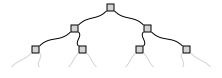

hauteur_si_parfait(a) = 3
est_parfait(a) = True







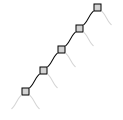

hauteur_si_parfait(a) = -1
est_parfait(a) = False







hauteur_si_parfait(a) = -1
est_parfait(a) = False







hauteur_si_parfait(a) = -1
est_parfait(a) = False







In [62]:
a1 = parfait(3)
a2 = peigne_gauche(5)
a3 = peigne_droite(5)
a4 = Noeud(gauche=parfait(3), droite=parfait(2))

for a in [a1, a2, a3, a4]:
    display(structure(a))
    print("hauteur_si_parfait(a) = {}".format(hauteur_si_parfait(a)))
    print("est_parfait(a) = {}".format(est_parfait(a)))
    print("\n\n\n\n")

1. Faire de même pour les fonctions `est_peigne_gauche(noeud)` et `est_peigne_droit(noeud)`.

In [64]:
def est_peigne_gauche(noeud):
    if noeud is None:
        return True
    else:
        return noeud.droite is None and est_peigne_gauche(noeud.gauche)

def est_peigne_droite(noeud):
    if noeud is None:
        return True
    else:
        return noeud.gauche is None and est_peigne_droite(noeud.droite)


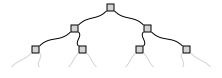

est_peigne_gauche(a) = False
est_peigne_droite(a) = False







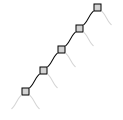

est_peigne_gauche(a) = True
est_peigne_droite(a) = False







est_peigne_gauche(a) = False
est_peigne_droite(a) = True







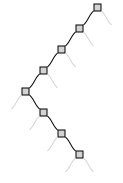

est_peigne_gauche(a) = False
est_peigne_droite(a) = False







In [65]:
a1 = parfait(3)
a2 = peigne_gauche(5)
a3 = peigne_droite(5)
a4 = peigne_gauche(4)
a4.gauche.gauche.gauche.gauche = peigne_droite(4)

for a in [a1, a2, a3, a4]:
    display(structure(a))
    print("est_peigne_gauche(a) = {}".format(est_peigne_gauche(a)))
    print("est_peigne_droite(a) = {}".format(est_peigne_droite(a)))
    print("\n\n\n\n")

---
## Exercice 8

Donner 5 arbres de taille 3, distincts, dont les noeuds contiennent les valeurs 1, 2 et 3 et pour lesquels la fonction `parcours_infixe` étudiée en cours affiche à chaque fois
```nil
1
2
3
```

**Correction algorithmique:**

Voici une implémentation qui part des 5 arbres de taille 3, et les remplit au fur et à mesure à l'aide d'un parcours en profondeur d'abord, de façon à ce que l'ordre d'affichage soit 1, 2 et 3 à chaque fois.

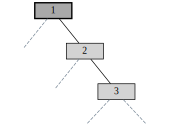

Vérification par un parcours infixe:
1 ; 2 ; 3 ; 






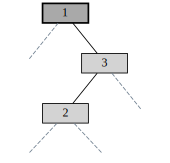

Vérification par un parcours infixe:
1 ; 2 ; 3 ; 






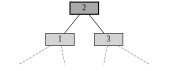

Vérification par un parcours infixe:
1 ; 2 ; 3 ; 






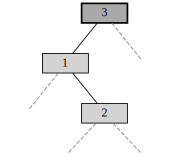

Vérification par un parcours infixe:
1 ; 2 ; 3 ; 






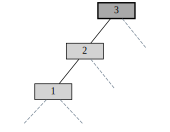

Vérification par un parcours infixe:
1 ; 2 ; 3 ; 






In [78]:
def remplit_arbre(noeud, chiffres):
    """
    Remplit les noeuds d'un arbre à l'aide des chiffres,
    en utilisant un parcours en profondeur d'abord.
    
    chiffres est une liste de chiffres à utiliser pour le
    remplissage, ils seront pris de gauche à droite.
    """
    if noeud is None:
        return
    else:
        remplit_arbre(noeud.gauche, chiffres)
        noeud.valeur = chiffres.pop(0)
        remplit_arbre(noeud.droite, chiffres)
        
def parcours_infixe(noeud):
    """
    Parcours un arbre en profondeur d'abord.
    
    Affiche les valeurs des noeuds en position infixe.
    """
    
    if noeud is None:
        return
    else:
        parcours_infixe(noeud.gauche)
        print(noeud.valeur, end=" ; ")
        parcours_infixe(noeud.droite)
        
for a in énumère_arbres(3):
    remplit_arbre(a, list("123"))
    display(graphe_arbre(a, largeur=6))
    print("Vérification par un parcours infixe:")
    parcours_infixe(a)
    print("\n\n\n\n")

---
## Exercice 9

Lors du parcours d'un arbre, si on affiche la valeur d'un noeud _avant_ d'affiche les 2 sous-arbres, on parle de **parcours préfixe**. À l'inverse, on parle de **parcours postfixe** lorsque la valeur est affichée _après_ avoir affiché les 2 sous-arbres.

Implémenter ces deux parcours.

In [91]:
def parcours_préfixe(noeud):
    """
    Parcours un arbre en profondeur d'abord suivant un ordre préfixe.
    
    Renvoie la liste des valeurs des noeuds.
    """
    
    if noeud is None:
        return []
    else:
        valeurs = []
        valeurs.append(str(noeud.valeur))
        valeurs.extend(parcours_préfixe(noeud.gauche))
        valeurs.extend(parcours_préfixe(noeud.droite))
        return valeurs
    
def parcours_infixe(noeud):
    """
    Parcours un arbre en profondeur d'abord suivant un ordre infixe.
    
    Renvoie la liste des valeurs des noeuds.
    """
    
    if noeud is None:
        return []
    else:
        valeurs = []
        valeurs.extend(parcours_infixe(noeud.gauche))
        valeurs.append(str(noeud.valeur))
        valeurs.extend(parcours_infixe(noeud.droite))
        return valeurs
    
def parcours_postfixe(noeud):
    """
    Parcours un arbre en profondeur d'abord suivant un ordre postfixe.
    
    Renvoie la liste des valeurs des noeuds.
    """
    
    if noeud is None:
        return []
    else:
        valeurs = []
        valeurs.extend(parcours_postfixe(noeud.gauche))
        valeurs.extend(parcours_postfixe(noeud.droite))
        valeurs.append(str(noeud.valeur))
        return valeurs

In [93]:
a = Noeud("*", 
       Noeud("+", 
             Noeud("1"), 
             Noeud("2")), 
       Noeud("3"))

display(graphe_arbre(a, largeur=10))
print("Parcours préfixe:", " ".join(parcours_préfixe(a)))
print("Parcours infixe:", " ".join(parcours_infixe(a)))
print("Parcours postfixe:", " ".join(parcours_postfixe(a)))

Parcours préfixe: * + 1 2 3
Parcours infixe: 1 + 2 * 3
Parcours postfixe: 1 2 + 3 *


**Remarque:** Le parcours postfixe nous donne l'expression mathématique en notation polonaise inverse étudiée dans un chapitre précédent (piles et files).

---
## Exercice 10

Reprendre l'exercice sur la notation **polonaise inverse** du TP sur les piles, et modifiez la fonction de cet exercice pour qu'elle ne renvoie non pas le résultat du calcul, mais l'arbre représentant l'expression à calculer.

Par exemple, avec `"1 2 + 3 *"`, on obtiendra l'arbre suivant:

In [79]:
graphe_arbre(Noeud("*", 
                   Noeud("+", 
                         Noeud("1"), 
                         Noeud("2")), 
                   Noeud("3")))

In [2]:
def découpe_mots(chaîne):
    """
    Prend en paramètre une chaîne de caractères constitués d'entiers 
    et/ou d'opérateurs séparés par des espaces. 
    
    Découpe cette chaîne et renvoie une liste d'opérateurs/
    opérandes.
    
    Les opérandes sont converties en entiers. La liste sera mixte: 
    int/str.
    """
    
    liste = []
    mot = ""
    N = len(chaîne)
    for i in range(N):
        c = chaîne[i]
        
        if c != " ":
            # Un caractère non-espace: on le rajoute au mot
            mot += c
        
        if c == " " or i == N - 1:
            # Un espace: on l'ignore
            # Ou bien on est à la fin de la chaîne

            # Il y a peut-être un mot à sauvegarder:
            if len(mot) > 0:
                
                # Le mot est-il un entier ?
                try:
                    n = int(mot)
                    # Pas d'exception déclenchée => Oui !
                    liste.append(n)
                except ValueError:
                    # Exception => Non !
                    liste.append(mot)
                mot = ""
                
    return liste

In [15]:
from piles import Pile

def postfixe_vers_arbre(chaîne):
    """
    Prend en paramètre une expression mathématique en notation postfixée
    (les opérateurs et opérandes sont séparés par un ou plusieurs espaces).
    
    Opérateurs acceptés: +, -, *, / et neg pour la négation.
    
    Renvoie l'arbre représentant cette expression.
    
    Déclenche une erreur en cas d'expression incorrecte.
    """

    p = Pile()
    
    mots = découpe_mots(chaîne)
    for mot in mots:
        if str(mot) in '+-*/':
            if p.taille() < 2:
                raise ValueError("Calcul incorrect")
            op2 = p.dépiler()
            op1 = p.dépiler()
            résultat = Noeud(str(mot), op1, op2)
            p.empiler(résultat)
        elif mot == 'neg':
            op = p.dépiler()
            p.empiler(-op)
        else:
            # Ça doit être un nombre
            p.empiler(Noeud(mot))
            
    # À la fin, la pile ne doit contenir qu'un unique élément: 
    # le résultat.
    
    if p.taille() != 1:
        raise ValueError("Calcul incorrect")
        
    return p.dépiler()

In [20]:
graphe_arbre(postfixe_vers_arbre("1 2 + 3 1 - /"), largeur=14)